In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

In [10]:
folder_path = r"D:\USTH\Year_3\Internship\DeffendThesis\Defend-Thesis\Data"
file_name = "Data_UF_cleaned.xlsx"


df = pd.read_excel(f"{folder_path}\\{file_name}")

In [11]:
print("=== INFO ===")
print(df.info())

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28623 entries, 0 to 28622
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Contract_ID         26593 non-null  object 
 1   Gender              28623 non-null  int64  
 2   Age                 28623 non-null  int64  
 3   Region              26593 non-null  object 
 4   Managing Branch     26593 non-null  object 
 5   Sales Unit          9272 non-null   object 
 6   Selling branch      24832 non-null  object 
 7   Sales Region        24832 non-null  object 
 8   Creation Date       28623 non-null  object 
 9   OrderID/RegCode     21282 non-null  object 
 10  Transaction Code    1254 non-null   object 
 11  Type                16927 non-null  object 
 12  FG Package Command  23622 non-null  object 
 13  Payment Month       28623 non-null  int64  
 14  Revenue             28622 non-null  float64
 15  Sales Channel       27490 non-null  obje

In [12]:
print("\n=== DESCRIBE ===")
print(df.describe(include='all'))


=== DESCRIBE ===
                  Contract_ID        Gender           Age          Region  \
count                   26593  28623.000000  28623.000000           26593   
unique                  26539           NaN           NaN              15   
top     HD4018334318042840576           NaN           NaN  07.Ho Chi Minh   
freq                        3           NaN           NaN           15386   
mean                      NaN      0.445970     41.028159             NaN   
std                       NaN      0.497081     10.804223             NaN   
min                       NaN      0.000000     16.000000             NaN   
25%                       NaN      0.000000     33.000000             NaN   
50%                       NaN      0.000000     41.000000             NaN   
75%                       NaN      1.000000     49.000000             NaN   
max                       NaN      1.000000     66.000000             NaN   

       Managing Branch Sales Unit Selling branch    Sales

In [13]:
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())




=== MISSING VALUES ===
Contract_ID            2030
Gender                    0
Age                       0
Region                 2030
Managing Branch        2030
Sales Unit            19351
Selling branch         3791
Sales Region           3791
Creation Date             0
OrderID/RegCode        7341
Transaction Code      27369
Type                  11696
FG Package Command     5001
Payment Month             0
Revenue                   1
Sales Channel          1133
Status FGame              0
Active Date            2924
Service Start Date     8062
Service End Date       8063
Internet Package       2924
Cancellation Date     15199
Sales Method              0
dtype: int64


In [14]:
# Remove row contain "Bundle"
df = df[df['Sales Method'] != 'Bundle']


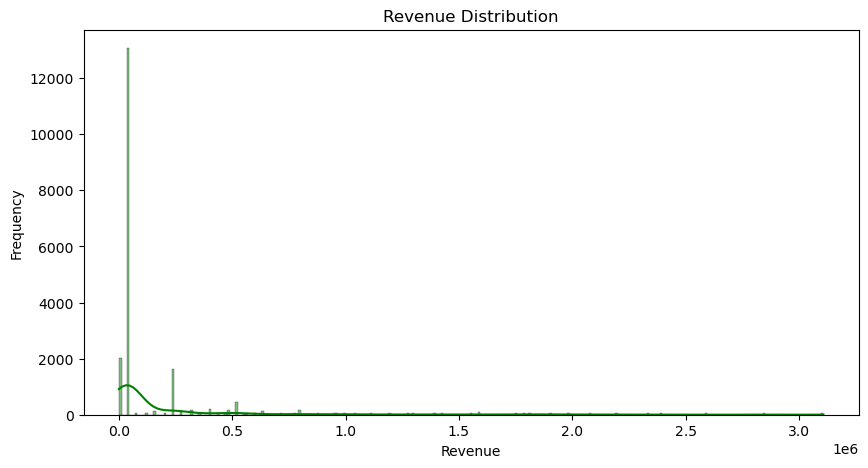

In [15]:
# ---------------------------
# 2. REVENUE DISTRIBUTION
# ---------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df['Revenue'], kde=True, color='green')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

In [16]:
from dateutil import parser
# Force full parsing first (convert all to datetime)
def parse_mixed_date_force(date_str):
    try:
        return pd.to_datetime(str(date_str), dayfirst=True, errors='coerce')
    except:
        return pd.NaT

df['Creation Date'] = df['Creation Date'].apply(parse_mixed_date_force)

# Now format to consistent dd/mm/yyyy
df['Creation Date'] = pd.to_datetime(df['Creation Date'], format='%d/%m/%Y', errors='coerce')
    
# Group by month and compute total revenue
df['month'] = df['Creation Date'].dt.to_period('M')
monthly_revenue = df.set_index('Creation Date').resample('M')['Revenue'].sum()
monthly_revenue = monthly_revenue[monthly_revenue > 0].reset_index()




df

C:\Users\Thinkpad P1\AppData\Local\Temp\ipykernel_41696\210790394.py:5: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(str(date_str), dayfirst=True, errors='coerce')
C:\Users\Thinkpad P1\AppData\Local\Temp\ipykernel_41696\210790394.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.set_index('Creation Date').resample('M')['Revenue'].sum()


,Contract_ID,Gender,Age,Region,Managing Branch,Sales Unit,Selling branch,Sales Region,Creation Date,OrderID/RegCode,...,Revenue,Sales Channel,Status FGame,Active Date,Service Start Date,Service End Date,Internet Package,Cancellation Date,Sales Method,month
0,HD1262187733434228224,1,59,07.Ho Chi Minh,HCM_02,NaN,NaN,NaN,2024-01-01,FG00027082,...,39900.0,Hi-FPT,Canceled,1/1/2024,1/1/2024,1/2/2024,Meta,01/02/2024,Code,2024-01
1,HD138975645429405536,1,36,07.Ho Chi Minh,HCM_04,NaN,NaN,NaN,2024-01-01,FG00027050,...,39900.0,Hi-FPT,Canceled,1/1/2024,1/1/2024,1/2/2024,Meta,01/02/2024,Code,2024-01
2,HD1415792837332678912,0,54,07.Ho Chi Minh,HCM_03,NaN,NaN,NaN,2024-01-01,FG00027095,...,39900.0,Hi-FPT,Canceled,1/1/2024,1/1/2024,1/2/2024,Meta,01/02/2024,Code,2024-01
3,HD1594279484202634496,0,31,11.Tay Bac Bo,PTO,NaN,NaN,NaN,2024-01-01,FG00027102,...,39900.0,Hi-FPT,Canceled,1/1/2024,1/1/2024,1/2/2024,Sky,01/02/2024,Code,2024-01
6,HD2492698124504546304,0,43,07.Ho Chi Minh,HCM_01,NaN,NaN,NaN,2024-01-01,FG00027044,...,39900.0,Hi-FPT,Canceled,1/1/2024,1/1/2024,1/2/2024,Meta,01/02/2024,Code,2024-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28617,SIM1000004994,0,28,13.Tay Nguyen - Mien Trung,HUE,NaN,DNI,01.Ha Noi,2024-05-08,SIMORDER4994,...,1990000.0,Hi-FPT,Activated,2024-05-08 00:00:00,31/08/2024,27/06/2025,Meta F1,NaN,Extra,2024-05
28618,SIM1000004995,0,47,03.Hai Duong,NAN,IBB,LDG,06.Khanh Hoa,2024-01-03,SIMORDER4995,...,878900.0,Hi-FPT,Activated,2024-01-03 00:00:00,2024-10-03 00:00:00,2024-08-06 00:00:00,FTTH - Super100,NaN,Code,2024-01
28620,SIM1000004997,0,22,01.Ha Noi,DNG,OBB,HTH,09.Binh Duong,2024-06-05,SIMORDER4997,...,239700.0,Online,Activated,2024-06-05 00:00:00,16/05/2024,2025-11-04 00:00:00,LUX - 800 Multi,NaN,Extra,2024-06
28621,SIM1000004998,1,18,03.Hai Duong,CMU,OBB,BTE,10.Vung Tau,2024-07-28,SIMORDER4998,...,159800.0,Online,Activated,28/07/2024,2024-06-08 00:00:00,2024-05-10 00:00:00,FTTH - Super80,NaN,Extra,2024-07


In [17]:
#df.to_excel('output.xlsx', index=False)


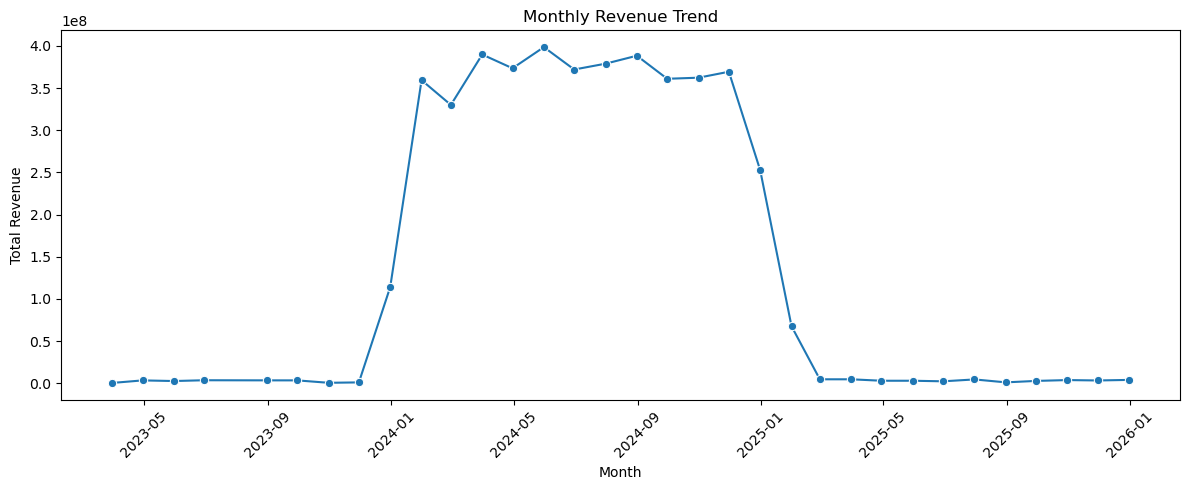

Month-over-Month Revenue Changes:
   Creation Date      Revenue  Revenue_diff  Revenue_pct_change
0     2023-03-31     319600.0           NaN                 NaN
1     2023-04-30    3326000.0     3006400.0          940.675845
2     2023-05-31    2568700.0     -757300.0          -22.769092
3     2023-06-30    3504100.0      935400.0           36.415307
4     2023-08-31    3367000.0     -137100.0           -3.912560
5     2023-09-30    3344000.0      -23000.0           -0.683101
6     2023-10-31     479400.0    -2864600.0          -85.663876
7     2023-11-30     954000.0      474600.0           98.998748
8     2023-12-31  114019900.0   113065900.0        11851.771488
9     2024-01-31  359335800.0   245315900.0          215.151829
10    2024-02-29  329971800.0   -29364000.0           -8.171744
11    2024-03-31  389748000.0    59776200.0           18.115548
12    2024-04-30  373395400.0   -16352600.0           -4.195685
13    2024-05-31  398491800.0    25096400.0            6.721133
14    

In [18]:


# ---------------------------
# 5. Compute changes
# ---------------------------
monthly_revenue['Revenue_diff'] = monthly_revenue['Revenue'].diff()
monthly_revenue['Revenue_pct_change'] = monthly_revenue['Revenue'].pct_change() * 100

# ---------------------------
# 6. Plot Monthly Revenue
# ---------------------------
plt.figure(figsize=(12, 5))
sns.lineplot(x='Creation Date', y='Revenue', data=monthly_revenue, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

# ---------------------------
# 7. Optional: Show MoM changes
# ---------------------------
print("Month-over-Month Revenue Changes:")
print(monthly_revenue[['Creation Date', 'Revenue', 'Revenue_diff', 'Revenue_pct_change']])

In [19]:
monthly_revenue

,Creation Date,Revenue,Revenue_diff,Revenue_pct_change
0,2023-03-31,319600.0,NaN,NaN
1,2023-04-30,3326000.0,3006400.0,940.675845
2,2023-05-31,2568700.0,-757300.0,-22.769092
3,2023-06-30,3504100.0,935400.0,36.415307
4,2023-08-31,3367000.0,-137100.0,-3.912560
5,2023-09-30,3344000.0,-23000.0,-0.683101
6,2023-10-31,479400.0,-2864600.0,-85.663876
7,2023-11-30,954000.0,474600.0,98.998748
8,2023-12-31,114019900.0,113065900.0,11851.771488
9,2024-01-31,359335800.0,245315900.0,215.151829


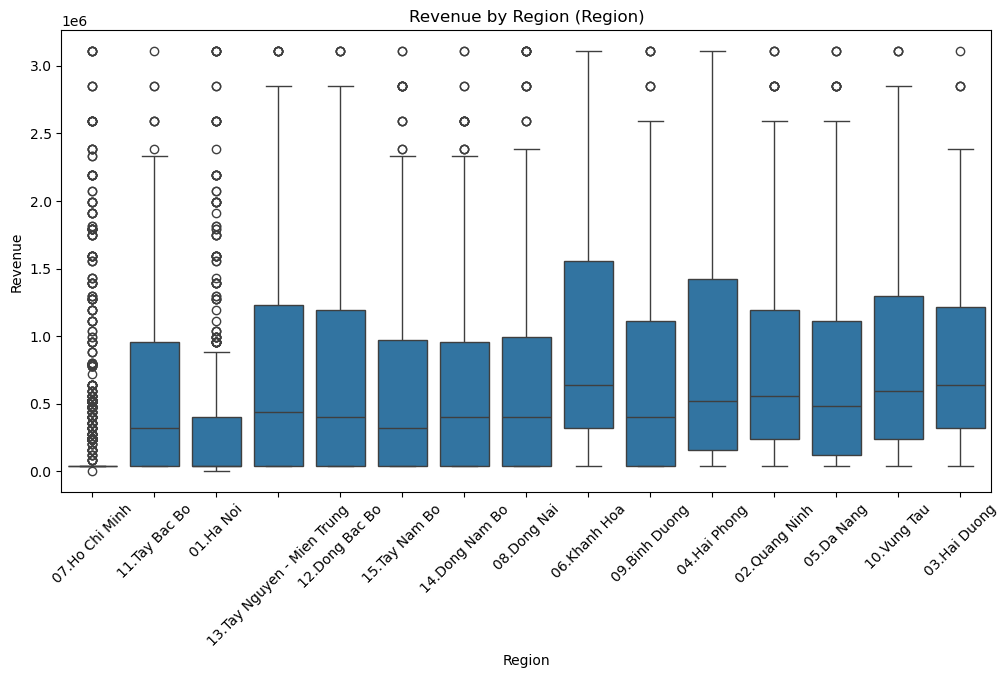


=== AVERAGE REVENUE BY REGION ===
Region
06.Khanh Hoa                  953115.555556
04.Hai Phong                  873781.632653
10.Vung Tau                   863273.442623
02.Quang Ninh                 846618.473896
03.Hai Duong                  827603.461538
05.Da Nang                    743310.580205
12.Dong Bac Bo                724613.293051
08.Dong Nai                   721065.083799
13.Tay Nguyen - Mien Trung    715447.519582
09.Binh Duong                 697939.880952
14.Dong Nam Bo                684933.620690
15.Tay Nam Bo                 644553.055556
11.Tay Bac Bo                 601956.772334
01.Ha Noi                     365576.733436
07.Ho Chi Minh                 89687.403072
Name: Revenue, dtype: float64


In [20]:
# ---------------------------
# 4. REVENUE BY REGION
# ---------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Revenue', data=df)
plt.title('Revenue by Region (Region)')
plt.xticks(rotation=45)
plt.show()

region_avg = df.groupby('Region')['Revenue'].mean().sort_values(ascending=False)
print("\n=== AVERAGE REVENUE BY REGION ===")
print(region_avg)

## Customer Profile Analysis

### Gender

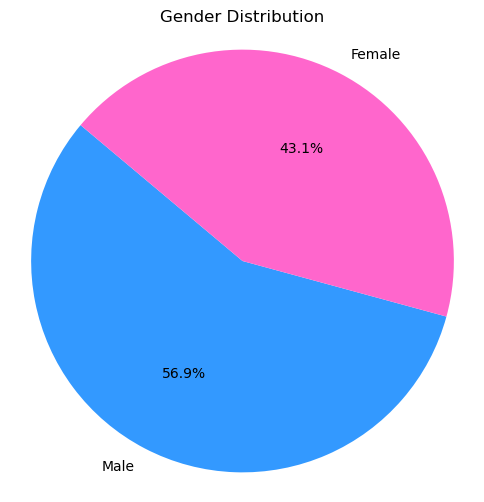

In [21]:
# 0:Nam 1:Nữ 
gender_counts = df['Gender'].value_counts()

labels = ['Male','Female']
sizes = [gender_counts.get(0,0), gender_counts.get(1,0)]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#3399FF', '#FF66CC'], startangle=140)
plt.title('Gender Distribution')
plt.axis('equal') 
plt.show()

### Age range

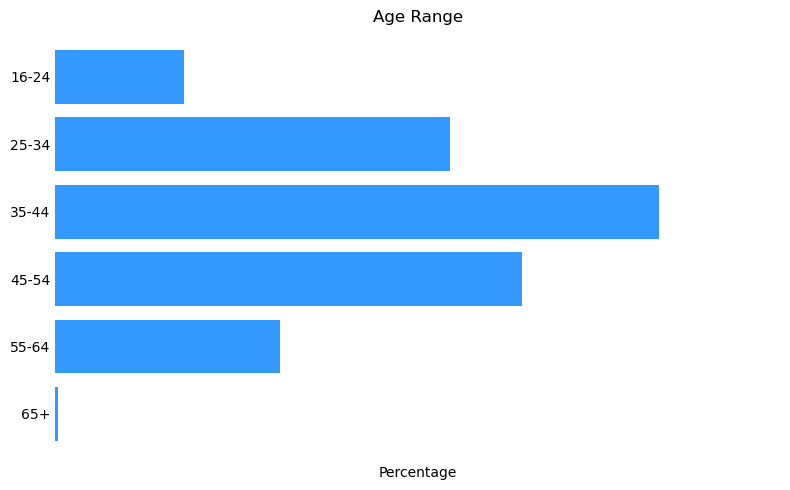

In [22]:
bins = [16, 24, 34, 44, 54, 64, 100]
labels = ['16-24', '25-34', '35-44', '45-54', '55-64', '65+']


# Step 3: Create a new column with age ranges
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Step 4: Count and normalize
age_groups_order = labels
age_counts = df['Age Range'].value_counts().reindex(age_groups_order, fill_value=0)
age_proportions = age_counts / age_counts.sum()

# Step 5: Plot
plt.figure(figsize=(8, 5))
plt.barh(age_groups_order, age_proportions, color='#3399FF')

plt.xlabel('Percentage')
plt.title('Age Range')

# Fix x-axis limit
max_value = age_proportions.max()
if max_value == 0:
    max_value = 1
plt.xlim(0, max_value * 1.2)

plt.xticks([])  # Hide numbers
plt.gca().invert_yaxis()

# Hide spines and ticks
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(axis='y', length=0)

plt.tight_layout()
plt.show()

In [23]:
df['Contract_ID'].value_counts()

Contract_ID
HD4018334318042840576    3
HD6943743001756179456    2
HD3951366192358597632    2
HD4146503099255920128    2
HD4228402906153288704    2
                        ..
HD1038312919472864896    1
HD127628521957377168     1
HD1664286453636351232    1
HD1791348816712450048    1
SIM1000004999            1
Name: count, Length: 18426, dtype: int64

In [24]:
duplicates = df[df['Contract_ID'].duplicated(keep=False)]
print(duplicates)


                 Contract_ID  Gender  Age          Region Managing Branch  \
1293   HD5438888045443808256       0   19  07.Ho Chi Minh          HCM_04   
3749                     NaN       0   33             NaN             NaN   
3750                     NaN       0   43             NaN             NaN   
3751                     NaN       0   42             NaN             NaN   
3752                     NaN       0   47             NaN             NaN   
...                      ...     ...  ...             ...             ...   
22938    HD95068320938616656       0   40  07.Ho Chi Minh          HCM_04   
22958  HD3319159152106828288       1   28  07.Ho Chi Minh          HCM_04   
23566                    NaN       0   39             NaN             NaN   
25646          SIM1000002024       0   49  14.Dong Nam Bo             CMU   
25647          SIM1000002024       0   59   02.Quang Ninh             HDG   

      Sales Unit Selling branch    Sales Region Creation Date OrderID/RegCo

In [25]:
duplicates = df['Contract_ID'].value_counts()
duplicates = duplicates[duplicates > 1]
print(duplicates)

Contract_ID
HD4018334318042840576    3
HD6943743001756179456    2
HD3951366192358597632    2
HD4146503099255920128    2
HD4228402906153288704    2
HD8358924727359758336    2
HD8681003409337063424    2
HD5650852625765238784    2
HD2736817424462745088    2
HD8999751778095042560    2
HD157009308889108032     2
HD8873656229931550720    2
HD1938783856451533568    2
HD3308571318735754752    2
HD3768871471804996096    2
HD3319159152106828288    2
SIM1000002024            2
HD7766642411918927872    2
HD6513951671267010560    2
HD6978055731008976896    2
HD1157350999381266688    2
HD5438888045443808256    2
HD95068320938616656      2
HD7365966947959319552    2
HD3921092924113845248    2
HD8341352671055760384    2
Name: count, dtype: int64


### Region Distribution

In [26]:
region_counts = df['Region'].value_counts()


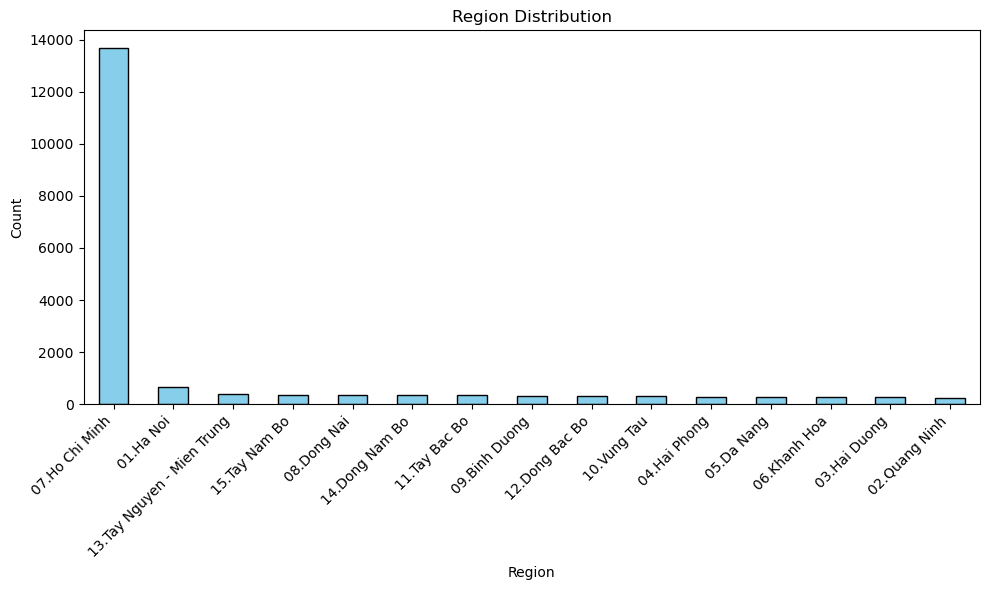

In [27]:
# Bar chart for better clarity
plt.figure(figsize=(10,6))
region_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Count')
plt.title('Region Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


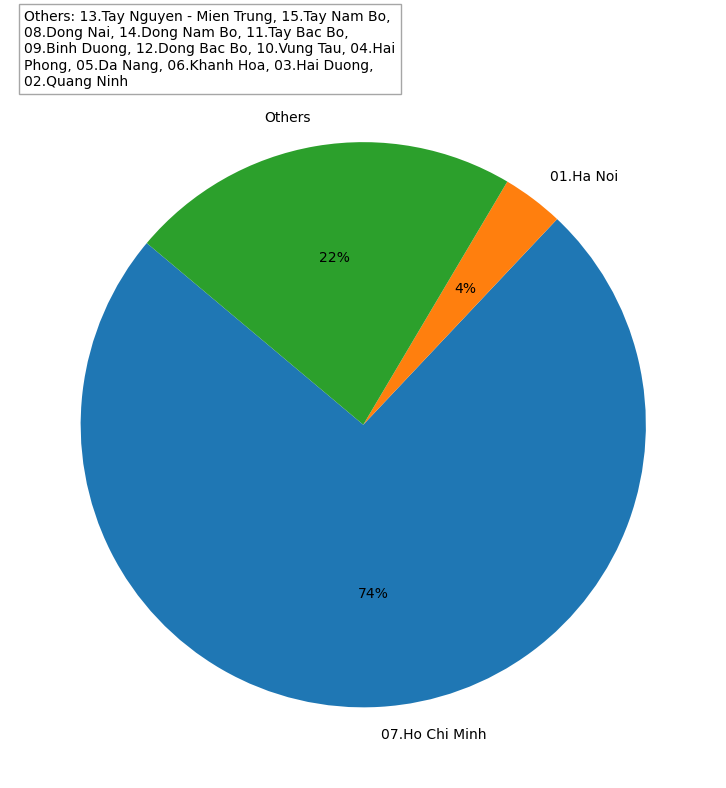

In [28]:
import textwrap

# Group small slices into 'Others'
threshold = 0.03  # 3% threshold
region_percents = df['Region'].value_counts(normalize=True)

# Split into large and small regions
large_regions = region_percents[region_percents > threshold]
small_regions = region_percents[region_percents <= threshold]

# Combine
combined = large_regions.copy()
combined['Others'] = small_regions.sum()

# Prepare note text and wrap it
others_text = "Others: " + ", ".join(small_regions.index.tolist())
wrapped_text = "\n".join(textwrap.wrap(others_text, width=50))  # wrap at 50 characters

# Plot pie chart
plt.figure(figsize=(10,8))
plt.pie(combined, labels=combined.index, autopct='%1.0f%%', startangle=140)

# Add wrapped note in the top-left
plt.text(-1.2, 1.2, wrapped_text, ha='left', fontsize=10, bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.tight_layout()
plt.show()


## Sales Performance Overview


### Total revenue

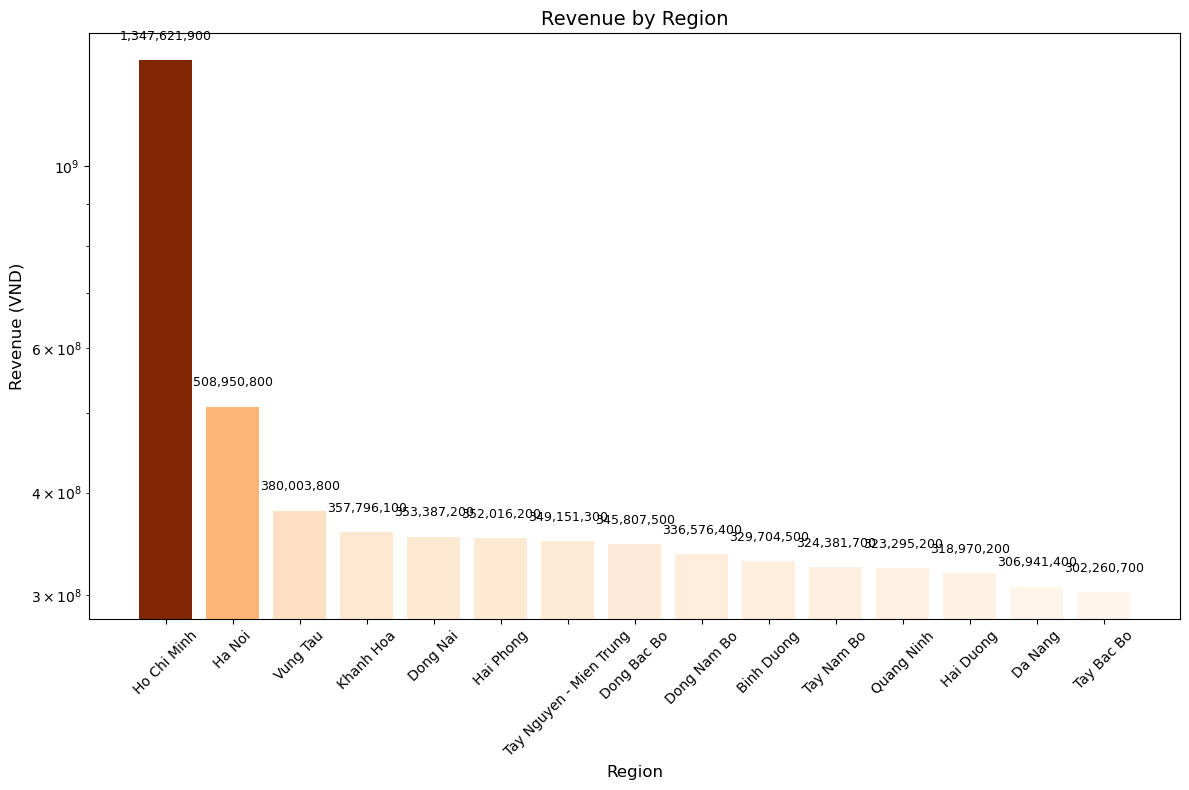

In [11]:
user_data = pd.read_excel(f"{folder_path}\\{file_name}")

user_data['Region_clean'] = user_data['Region'].str.replace(r'^\d+\.', '', regex=True).str.strip()

region_revenue = user_data.groupby('Region_clean')['Revenue'].sum().sort_values(ascending=False)

safe_region_revenue = region_revenue.copy()
safe_region_revenue[safe_region_revenue == 0] = 1  # Avoid zero for log scale

fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(safe_region_revenue.index, safe_region_revenue.values,
              color=plt.cm.Oranges(LogNorm(vmin=safe_region_revenue.min(), vmax=safe_region_revenue.max())(safe_region_revenue.values)))

# Add value labels on top of bars
for bar, value in zip(bars, region_revenue.values):
    ax.text(bar.get_x() + bar.get_width() / 2, value + value * 0.05,
            f"{int(value):,}", ha='center', va='bottom', fontsize=9)

# Set y-axis to log scale
ax.set_yscale('log')

# Titles and labels
ax.set_title('Revenue by Region', fontsize=14)
ax.set_ylabel('Revenue (VND)', fontsize=12)
ax.set_xlabel('Region', fontsize=12)
ax.tick_params(axis='x', rotation=45, labelsize=10)

plt.tight_layout()
plt.show()